In [1]:
import pandas as pd
import numpy as np

true_news = pd.read_csv(r'data\df_real_data.csv')
false_news = pd.read_csv(r'data\df_rumor_data.csv')
true_news.shape, false_news.shape

((10000, 8), (22479, 8))

In [2]:
true_false_news = true_news.append(false_news)
true_false_news = true_false_news.drop(['Unnamed: 0'], axis=1)
true_false_news = true_false_news.reset_index(drop=True)
true_false_news.head()

,authorDic,edges,keyUser,layerNum,rpsttimeline,status,weiboID
0,"{'province': '11', 'weiboText': '远去的大师', 'scre...",{},{'4010120209906916': 'http://tva3.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2014-12-31 22:50:00', 0], ['2014-12-31 23:0...",1,3793976291216967
1,"{'province': '11', 'weiboText': '中国青年女科学家奖十周年纪...",{'3658686746755393': {'posttime': 'Mon Dec 23 ...,{'4010120209906916': 'http://tva3.sinaimg.cn/c...,"[2, 0, 0, 0, 0, 0]","[['2013-12-18 11:00:00', 1], ['2013-12-18 11:1...",1,3656813583185243
2,"{'province': '11', 'weiboText': '【民办教师首次纳入职评体系...",{},{'4006787155492653': 'http://tva3.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2016-04-19 09:00:00', 0], ['2016-04-19 09:1...",1,3965901743766209
3,"{'province': '22', 'weiboText': '转发微博', 'scree...",{},{'4010300573400632': 'http://tva1.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2016-02-23 09:10:00', 0], ['2016-02-23 09:2...",1,3945608626241268
4,"{'province': '64', 'weiboText': '转发微博', 'scree...",{},{'4010300573400632': 'http://tva1.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2016-08-19 09:50:00', 0], ['2016-08-19 10:0...",1,4010124030948666


In [3]:
import ast
import datetime
def timeline(tl):
    tl = ast.literal_eval(tl)
    tmp = tl[0][0].split('-')
    return tmp[0]
true_false_news['repost_time'] = true_false_news['rpsttimeline'].apply(timeline)

In [4]:
from collections import Counter

dic = dict(Counter(true_false_news['repost_time']))
keys = sorted(dic)

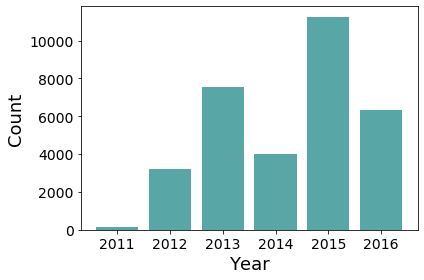

In [7]:
import matplotlib.pyplot as plt

font1 = {
    'weight' : 'normal',
    'size'   : 18,
}
font2 = {
    'weight' : 'normal',
    'size'   : 18,
}
# plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.bar(keys, [dic[key] for key in keys], color='#58a6a6')
ax.set_xlabel('Year', font1, color='black')
ax.set_ylabel('Count', font1, color='black')
# ax.legend(prop = font1, ncol=2)
ax.tick_params(labelsize=14, colors='black')
# ax.set_ylim(0,1)
plt.tight_layout()
plt.savefig('images/year_count.pdf')
plt.savefig('images/year_count.jpg', dpi=600)
plt.show()